In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate

In [38]:
iris = pd.read_csv("C:/iris.data",names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label'])

In [42]:
iris.keys()

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'label'], dtype='object')

In [52]:
iris_data = iris.data

iris_label = iris.target

AttributeError: 'DataFrame' object has no attribute 'data'

In [53]:
df_iris = pd.DataFrame(iris_data, columns = iris.keys)

df_iris

NameError: name 'iris_data' is not defined

In [39]:
iris

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [40]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
label           0
dtype: int64

In [44]:
data = iris.drop('label', axis = 1)

In [35]:
data

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [45]:
label

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


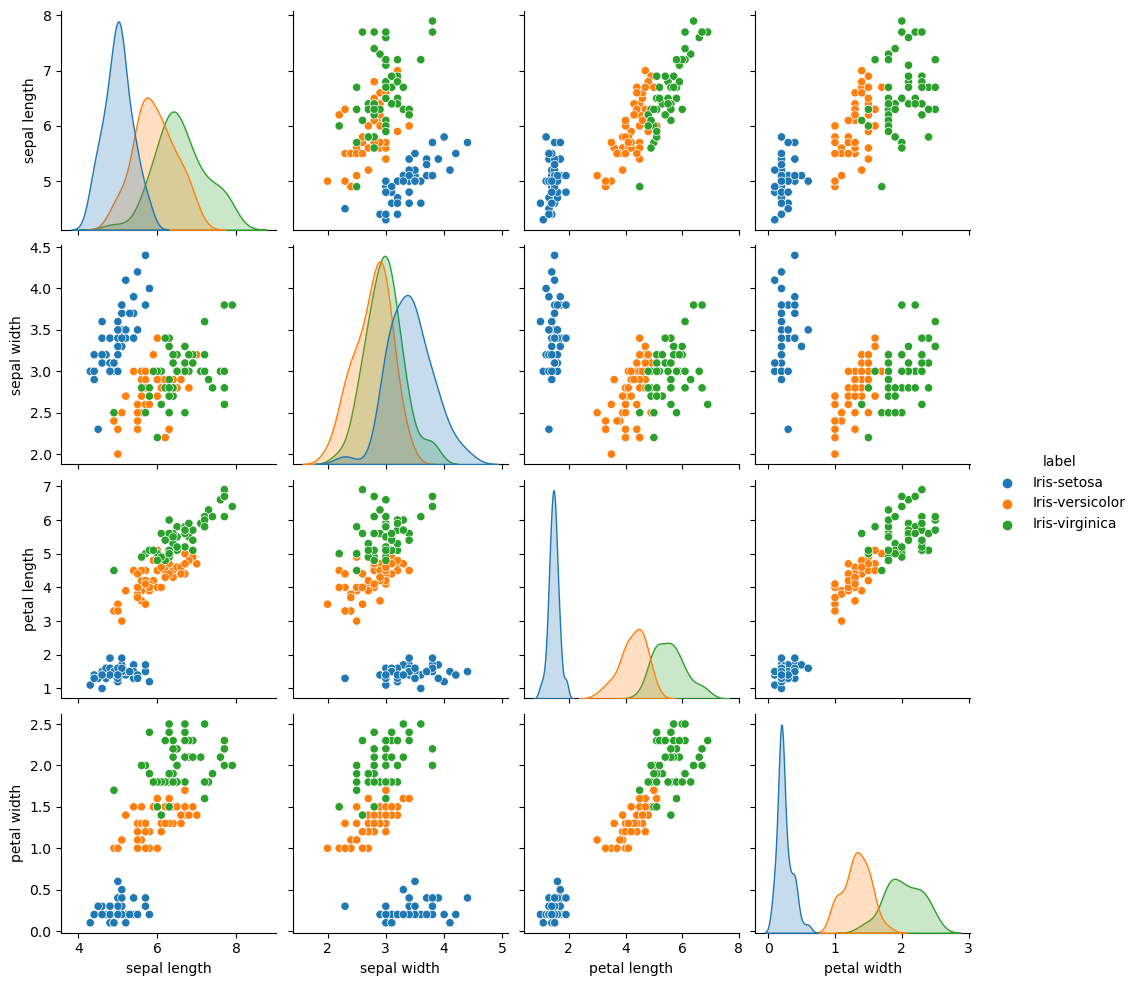

In [50]:
sns.pairplot(iris, vars=['sepal length', 'sepal width', 'petal length', 'petal width'], hue ='label')

plt.show()

In [55]:
X_data = data
y_data = label

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state = 0)

In [56]:
print("X_train.shape:", X_train.shape)

print("y_train.shape:", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape: (120, 4)
y_train.shape: (120, 4)
X_test.shape: (30, 4)
y_test.shape: (30, 4)


In [57]:
k = 3

mymodel = KNeighborsClassifier(n_neighbors = k)

mymodel.fit(X_train, y_train)

prediction = mymodel.predict(X_test)

print('Train Set Accuracy:', mymodel.score(X_train, y_train))

print('Test Set Accuracy:', mymodel.score(X_test, y_test))

ValueError: Unknown label type: 'continuous-multioutput'

In [58]:
#SVM
svm_clf = svm.SVC(kernel = 'linear')

scores = cross_val_score(svm_clf, X_train, y_train, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X_train, y_train, cv = 5))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  nan


C:\Users\82109\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\82109\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\82109\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 190, in fit
    X, y = self._validate_data(
  File "C:\Users\82109\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\82109\anaconda3\lib\site-packages

In [59]:
# LogisticRegression 학습/예측/평가

LR_clf = LogisticRegression()

LR_clf.fit(X_train, y_train)

LR_pred = LR_clf.predict(X_test)

print(accuracy_score(y_test, LR_pred))

ValueError: y should be a 1d array, got an array of shape (120, 4) instead.

In [60]:
#DecisionTreeClassifier 학습/예측/평가

DT_clf = DecisionTreeClassifier(random_state = 0)

DT_clf.fit(X_train, y_train)

DT_pred = DT_clf.predict(X_test)

print(accuracy_score(y_test, DT_pred))

ValueError: Unknown label type: 'continuous-multioutput'

In [61]:
# RandomForestClassifier 학습/예측/평가

RF_clf = RandomForestClassifier(random_state = 0)

RF_clf.fit(X_train, y_train)

RF_pred = RF_clf.predict(X_test)

print(accuracy_score(y_test, RF_pred))

ValueError: Unknown label type: 'continuous-multioutput'

In [ ]:
confusion_matrix(y_test,dt_clf.predict(X_test))